# Import Data

In [11]:
import pandas as pd
import numpy as np
import statistics

# unknown and 999 should be treated as missing values
df = pd.read_csv('bank-additional-full.csv', sep = ';', na_values = ['unknown', 999])
df = df.drop(columns = ['duration']) # drop future information
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# deal with campaign
# remove future information
df['ncalls'] = df['campaign'] - 1
df = df.drop(columns = ['campaign'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ncalls
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# EDA

In [3]:
print(df.shape)
print(df.dtypes)

(41188, 20)
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
ncalls              int64
dtype: object


In [4]:
# check if imbalanced
print(np.unique(df.y, return_counts = True)) # yes takes up 11%
sum(df.y == 'yes') / df.shape[0]
# data is balanced

(array(['no', 'yes'], dtype=object), array([36548,  4640]))


0.11265417111780131

In [5]:
# check missing values
perc_missing_per_ftr = df.isnull().sum(axis = 0) / df.shape[0]
print('Fraction of Missing Values in Features:') 
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print('Data Types of the Features with Missing Values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)

frac_missing = sum(df.isnull().sum(axis = 1) != 0) / df.shape[0]
print('Fraction of Rows with Missing Values:', frac_missing)

Fraction of Missing Values in Features:
job          0.008012
marital      0.001942
education    0.042027
default      0.208726
housing      0.024036
loan         0.024036
pdays        0.963217
dtype: float64
Data Types of the Features with Missing Values:
job           object
marital       object
education     object
default       object
housing       object
loan          object
pdays        float64
dtype: object
Fraction of Rows with Missing Values: 0.9681946197921725


# Visualization

Text(0.5, 1.0, 'Balance of y')

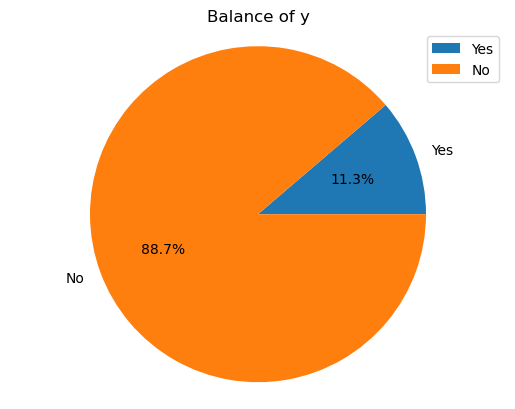

In [6]:
from matplotlib import pylab as plt
import seaborn as sns

# pie chart of y
labels = 'Yes', 'No'
sizes = [sum(df.y == 'yes') / df.shape[0], sum(df.y == 'no') / df.shape[0]]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax.axis('equal') 
ax.legend(labels, loc = 'upper right')
ax.set_title('Balance of y')

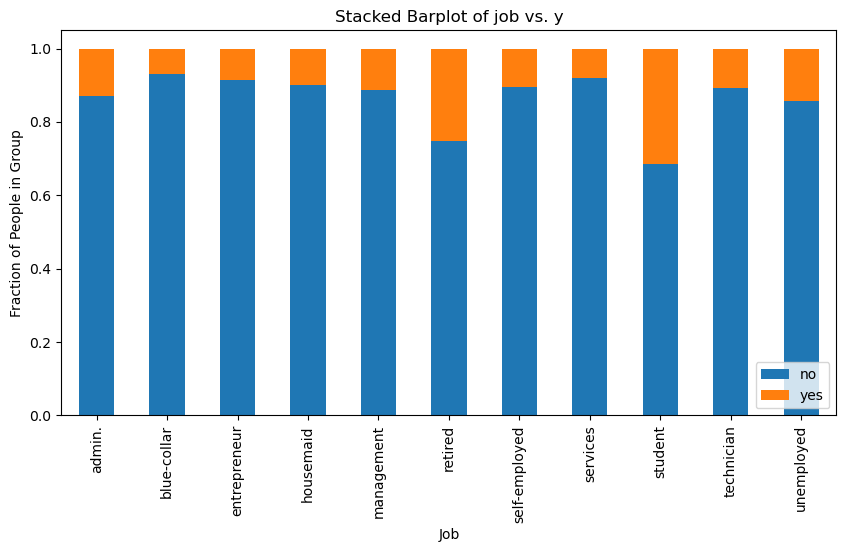

In [13]:
# job vs. y
count_matrix = df.groupby(['job', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', stacked = True, figsize = (10, 5)) 
plt.ylabel('Fraction of People in Group')
plt.xlabel('Job')
plt.legend(loc = 4)
plt.title('Stacked Barplot of job vs. y')
plt.show()

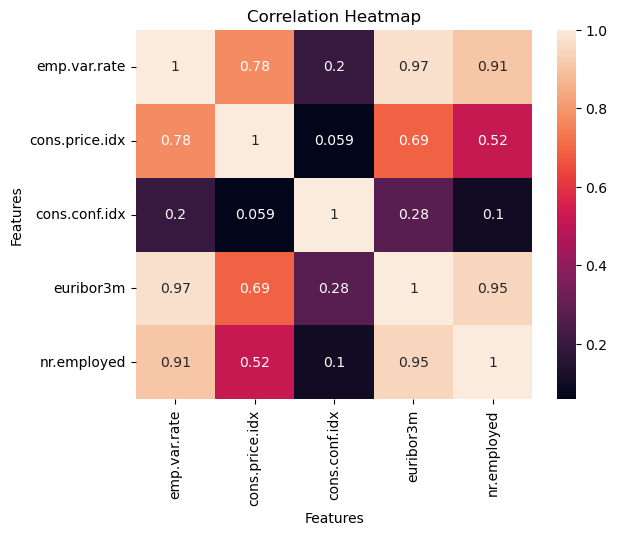

In [8]:
# correlation plot of economic features
df_econ = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
econ_corr = df_econ.corr()
sns.heatmap(econ_corr, annot = True).set(title = 'Correlation Heatmap', xlabel = 'Features', ylabel = 'Features')
plt.show()

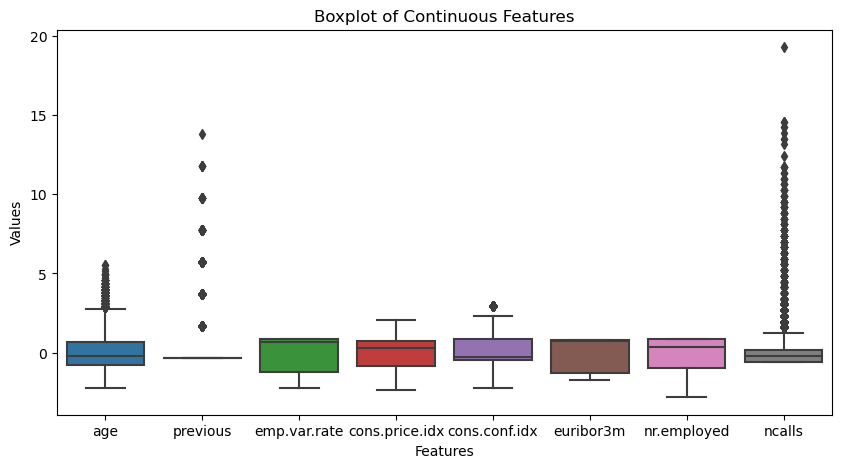

In [15]:
# boxplot of all numeric features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_num = df[['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'ncalls']]
num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
plt.figure(figsize = (10, 5))
sns.boxplot(data = num_scaled).set(title = 'Boxplot of Continuous Features', xlabel = 'Features', ylabel = 'Values')
plt.show()

# Define Preprocessors

In [21]:
# numerical: age, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, ncalls
# categorical: job, martial, default, housing, loan, contact
# ordinal: education, month, day_of_week, poutcome
cat_ftrs = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

ordinal_ftrs = ['education', 'month', 'day_of_week']
ordinal_cats = [['NA', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'],
                ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                ['mon', 'tue', 'wed', 'thu', 'fri']]

num_ftrs = ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'ncalls']

In [22]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')), 
    ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps = [
    ('imputer2', SimpleImputer(strategy = 'constant', fill_value = 'NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

# Splitting and Preprocessing

In [34]:
# splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
X = df.drop(columns = 'y')
y = df['y'] # this is a classification problem

# test set (20%)
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Test Set:', X_test.shape, y_test.shape)
print('\n')

# KFold and preprocessing
n_splits = 10
kf = KFold(n_splits = n_splits, shuffle = True, random_state = 42)
for train_index, val_index in kf.split(X_other, y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    # preprocessing
    # fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data = X_prep, columns = feature_names)
    print('Training Set:', df_train.shape)
    perc_missing_per_ftr = df_train.isnull().sum(axis = 0) / df_train.shape[0]
    print('Fraction of Missing Values in Features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('Data Types of the Features with Missing Values:')
    print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
    frac_missing = sum(df_train.isnull().sum(axis = 1) != 0) / df_train.shape[0]
    print('Fraction of Points with Missing Values:',frac_missing)
    
    # transform the validation set
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data = df_val, columns = feature_names)
    print('Validation Set:', df_val.shape)
    perc_missing_per_ftr = df_val.isnull().sum(axis = 0) / df_val.shape[0]
    print('Fraction of Missing Values in Features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('Data Types of the Features with Missing Values:')
    print(df_val[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
    frac_missing = sum(df_val.isnull().sum(axis = 1) != 0) / df_val.shape[0]
    print('Fraction of Points with Missing Values:',frac_missing)
    
    print('\n')
# transform the test set
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data = df_test, columns = feature_names)
print('Test Set:', df_test.shape)

Test Set: (8238, 19) (8238,)


Training Set: (29655, 42)
Fraction of Missing Values in Features:
num__pdays    0.96375
dtype: float64
Data Types of the Features with Missing Values:
num__pdays    float64
dtype: object
Fraction of Points with Missing Values: 0.9637497892429607
Validation Set: (3295, 42)
Fraction of Missing Values in Features:
num__pdays    0.961153
dtype: float64
Data Types of the Features with Missing Values:
num__pdays    float64
dtype: object
Fraction of Points with Missing Values: 0.9611532625189682


Training Set: (29655, 42)
Fraction of Missing Values in Features:
num__pdays    0.963682
dtype: float64
Data Types of the Features with Missing Values:
num__pdays    float64
dtype: object
Fraction of Points with Missing Values: 0.9636823469903895
Validation Set: (3295, 42)
Fraction of Missing Values in Features:
num__pdays    0.96176
dtype: float64
Data Types of the Features with Missing Values:
num__pdays    float64
dtype: object
Fraction of Points with Missing Values

In [24]:
print(feature_names)
print(len(feature_names))

['num__age' 'num__pdays' 'num__previous' 'num__emp.var.rate'
 'num__cons.price.idx' 'num__cons.conf.idx' 'num__euribor3m'
 'num__nr.employed' 'num__ncalls' 'cat__job_admin.' 'cat__job_blue-collar'
 'cat__job_entrepreneur' 'cat__job_housemaid' 'cat__job_management'
 'cat__job_missing' 'cat__job_retired' 'cat__job_self-employed'
 'cat__job_services' 'cat__job_student' 'cat__job_technician'
 'cat__job_unemployed' 'cat__marital_divorced' 'cat__marital_married'
 'cat__marital_missing' 'cat__marital_single' 'cat__default_missing'
 'cat__default_no' 'cat__default_yes' 'cat__housing_missing'
 'cat__housing_no' 'cat__housing_yes' 'cat__loan_missing' 'cat__loan_no'
 'cat__loan_yes' 'cat__contact_cellular' 'cat__contact_telephone'
 'cat__poutcome_failure' 'cat__poutcome_nonexistent'
 'cat__poutcome_success' 'ord__education' 'ord__month' 'ord__day_of_week']
42


# Missing Values in the Test Set

In [35]:
# check missing values
print('Data Dimensions:', df_test.shape)

perc_missing_per_ftr = df_test.isnull().sum(axis = 0) / df_test.shape[0]
print('Fraction of Missing Values in Features:') 
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print('Data Types of the Features with Missing Values:')
print(df_test[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)

frac_missing = sum(df_test.isnull().sum(axis = 1) != 0) / df_test.shape[0]
print('Fraction of Rows with Missing Values:', frac_missing)

Data Dimensions: (8238, 42)
Fraction of Missing Values in Features:
num__pdays    0.962127
dtype: float64
Data Types of the Features with Missing Values:
num__pdays    float64
dtype: object
Fraction of Rows with Missing Values: 0.9621267297887837
